## 1. Librerias Necesarias

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## 2. Carga de Datos

In [4]:
demanda_AC = np.array([
    173, 212, 225, 199, 205, 176, 215, 198, 198, 184,
    199, 211, 233, 195, 217, 209, 177, 161, 175, 209,
    197, 206, 167, 196, 205, 219, 184, 172, 207, 191,
    164, 216, 163, 236, 183, 213, 195, 182, 238, 141,
    178, 211, 165, 213, 186, 202, 186, 194, 210, 206,
    196, 197, 236, 173, 199, 211, 168, 181, 206, 216,
    196, 201, 180, 209, 176, 221, 190, 206, 190, 210
])

#### Estadisticas Descriptivas

In [5]:
#Resumen estadistico Scipy
resumen = stats.describe(demanda_AC)
print("Numero de observaciones: ", resumen.nobs)
print("Media: ", resumen.mean)
print("Moda: ", stats.mode(demanda_AC))
print("Varianza: ", resumen.variance)
print("Desviacion Estandar: ", np.sqrt(resumen.variance))
print(f"Minimo:  {resumen.minmax[0]:.2f}")
print(f"Maximo:  {resumen.minmax[1]:.2f}")
print("Skewness: ", resumen.skewness)
print("Kurtosis: ", resumen.kurtosis)



Numero de observaciones:  70
Media:  196.55714285714285
Moda:  ModeResult(mode=np.int64(206), count=np.int64(4))
Varianza:  391.93146997929597
Desviacion Estandar:  19.797259153208454
Minimo:  141.00
Maximo:  238.00
Skewness:  -0.21343077074928457
Kurtosis:  -0.13160850750515474


### Ajuste Distribucion de Datos

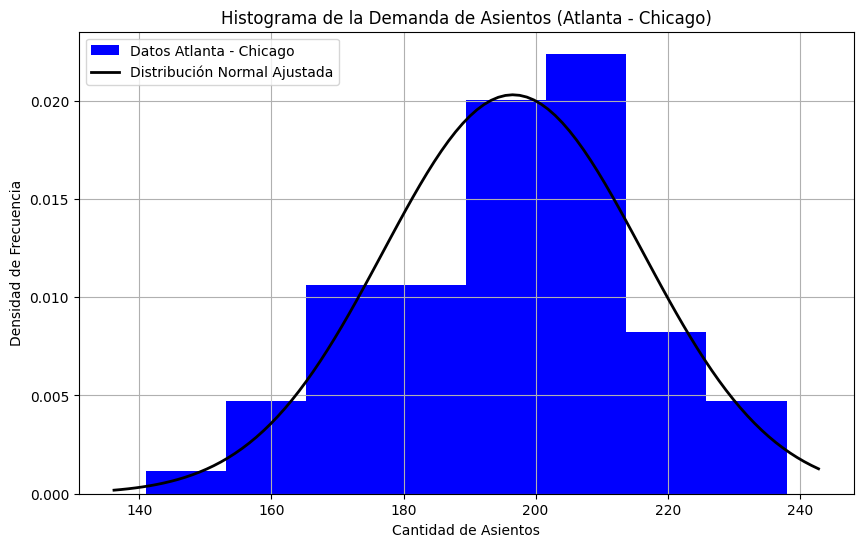

In [6]:
mu, sigma = stats.norm.fit(demanda_AC)
#mostrar histograma y ajuste de la distribucion normal
plt.figure(figsize=(10,6))
plt.hist(demanda_AC, bins="sturges", density=True,  color='b', label="Datos Atlanta - Chicago")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label="Distribución Normal Ajustada")
plt.title("Histograma de la Demanda de Asientos (Atlanta - Chicago)")
plt.xlabel("Cantidad de Asientos")
plt.ylabel("Densidad de Frecuencia")
plt.legend()
plt.grid()
plt.show()

#Nece

141 238 206


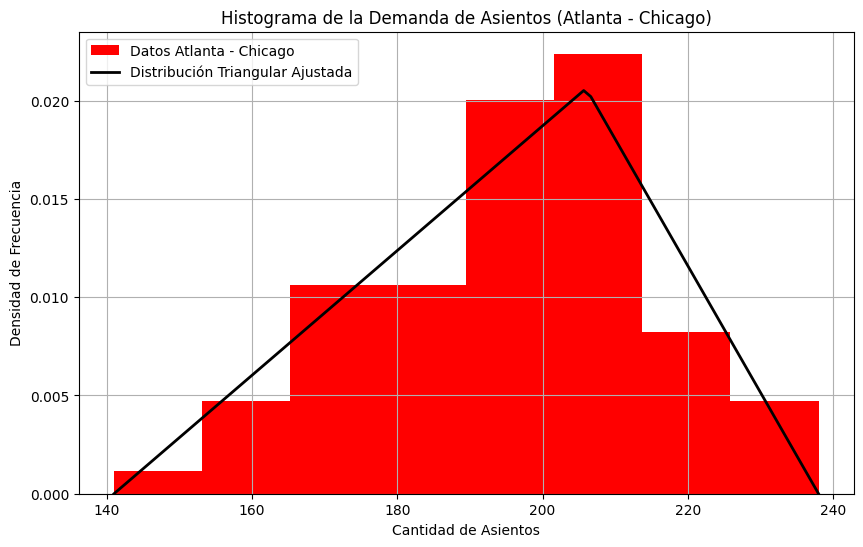

In [7]:
#Mostrar histograma y ajuste de la distribucion triangular
a = resumen.minmax[0]
b = resumen.minmax[1]
c = stats.mode(demanda_AC).mode
print(a,b,c)

plt.figure(figsize=(10,6))
plt.hist(demanda_AC, bins="sturges", density=True,  color='r', label="Datos Atlanta - Chicago")
x = np.linspace(a, b, 100)
p = stats.triang.pdf(x, c=(c-a)/(b-a), loc=a, scale=b-a)
plt.plot(x, p, 'k', linewidth=2, label="Distribución Triangular Ajustada")
plt.title("Histograma de la Demanda de Asientos (Atlanta - Chicago)")
plt.xlabel("Cantidad de Asientos")
plt.ylabel("Densidad de Frecuencia")
plt.legend()
plt.grid()
plt.show()


### Prueba de Bondad Kolmogorov-Smirnov

In [23]:
#Normal 
norm_stat, norm_pval = stats.kstest(demanda_AC, 'norm', args=(mu, sigma))

#Triangular
c_param = (c-a)/(b-a)
tri_stat, tri_pvalue = stats.kstest(demanda_AC, 'triang', args=(c_param, a, b-a))

#Organizar en un diccionario
data = {
    "Distribucion": ["Normal", "Triangular"],
    "KS-Statistic": [norm_stat, tri_stat],
    "P-Value": [norm_pval, tri_pvalue]
}

print(pd.DataFrame(data))


  Distribucion  KS-Statistic   P-Value
0       Normal      0.082714  0.693173
1   Triangular      0.076776  0.774804


Debido a que el Kolmogorov-Smirnov Statistic es de la distribucion triangular es de 0.07, menor que el de la normal, se puede decir que la distribucion triangular se ajusta mejor a los datos. Ademas, el p-value de la triangular (0.77) en comparacion con el de la normal (0.69) es mayor, lo que indica que la distribucion triangular es mas adecuada para los datos.

### 2. Entradas Conocidas

In [ ]:
primera_clase = {
    "BA" : 400,
    "AC" : 400,
    "CB" : 450,
}

clase_turista = {
    "BA" : 175,
    "AC" : 150,
    "CB" : 200,
}

costo_fijo = 100000


fracciones_primeraclase=[0.05, 0.12, 0.15]
probabilidades_primeraclase=[0.2, 0.5, 0.3]

### 3. Variables de Decision

In [24]:
filas_turista = 34
filas_primeraclase = 3

### 4. Entradas Inciertas

In [16]:
demanda_tramo_BA = stats.triang(c=(180-160)/(220-160), loc=160, scale=(220-160))
demanda_tramo_CB = stats.triang(c=(200-150)/(225-150), loc=150, scale=(225-150))
demanda_tramo_AC = stats.triang(c=(c-140)/(240-140), loc=140, scale=(240-140))


### 5. Calculos Intermedios

In [17]:



def simulacion(num_sim=25000):
    beneficios = []
    binom_pc = stats.rv_discrete(name='fracciones',values=(fracciones_primeraclase, probabilidades_primeraclase))

    for _ in range(num_sim):
        ingresos = 0
        
        #Demanda de asientos por tramo
        demanda_BA = demanda_tramo_BA.rvs()
        demanda_CB = demanda_tramo_CB.rvs()
        demanda_AC = demanda_tramo_AC.rvs()
        

        #Demanda de primera clase retornada por distribucion binomial
        demanda_primera_clase_BA = stats.binom.rvs(int(demanda_BA), binom_pc.rvs())
        demanda_turista_BA = demanda_BA - demanda_primera_clase_BA

        demanda_primera_clase_AC = stats.binom.rvs(int(demanda_AC), binom_pc.rvs())
        demanda_turista_AC = demanda_AC - demanda_primera_clase_AC

        demanda_primera_clase_CB = stats.binom.rvs(int(demanda_CB), binom_pc.rvs())
        demanda_turista_CB = demanda_CB - demanda_primera_clase_CB


        #Ocupacion de asientos
        ocupados_turista_BA = min(demanda_turista_BA, filas_turista * 6)
        ocupados_primera_clase_BA = min(demanda_primera_clase_BA, filas_primeraclase * 4)

        ocupados_turista_AC = min(demanda_turista_AC, filas_turista * 6)
        ocupados_primera_clase_AC = min(demanda_primera_clase_AC, filas_primeraclase * 4)

        ocupados_turista_CB = min(demanda_turista_CB, filas_turista * 6)
        ocupados_primera_clase_CB = min(demanda_primera_clase_CB, filas_primeraclase * 4)
        

        #Calculo de ingresos
        ingresos += ocupados_primera_clase_BA * primera_clase["BA"]
        ingresos += ocupados_turista_BA * clase_turista["BA"]
        ingresos += ocupados_primera_clase_AC * primera_clase["AC"]
        ingresos += ocupados_turista_AC * clase_turista["AC"]
        ingresos += ocupados_primera_clase_CB * primera_clase["CB"]
        ingresos += ocupados_turista_CB * clase_turista["CB"]

        beneficio = ingresos - costo_fijo
        beneficios.append(beneficio)
        
    return beneficios




        

            

### 6. Salidas

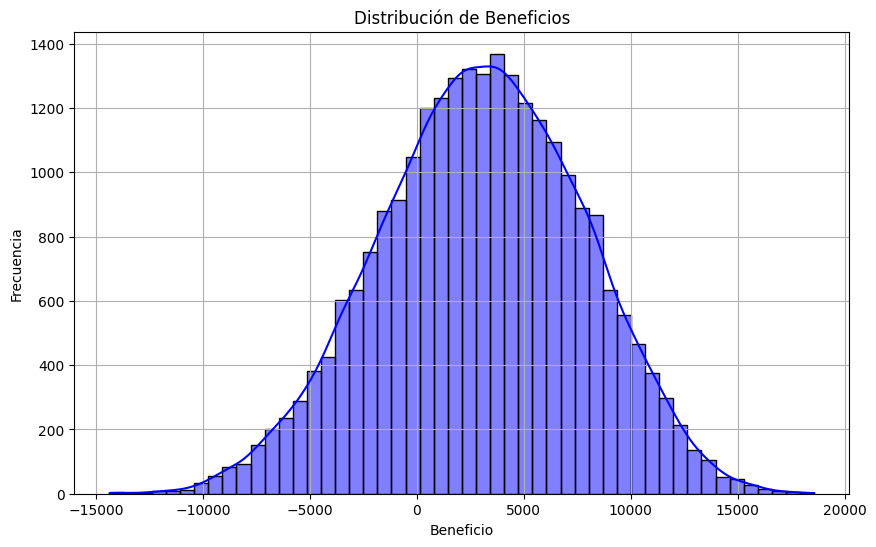

Beneficio Esperado:  3011.6461731571735


In [27]:
resultados = simulacion()
plt.figure(figsize=(10,6))
sns.histplot(resultados, bins=50, kde=True, color='b')
plt.title("Distribución de Beneficios")
plt.xlabel("Beneficio")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()

print("Beneficio Esperado: ", np.mean(resultados))



Punto C.


Total de beneficios en equilibrio:  18371
Porcentaje de beneficios positivos:  73.48400000000001 %


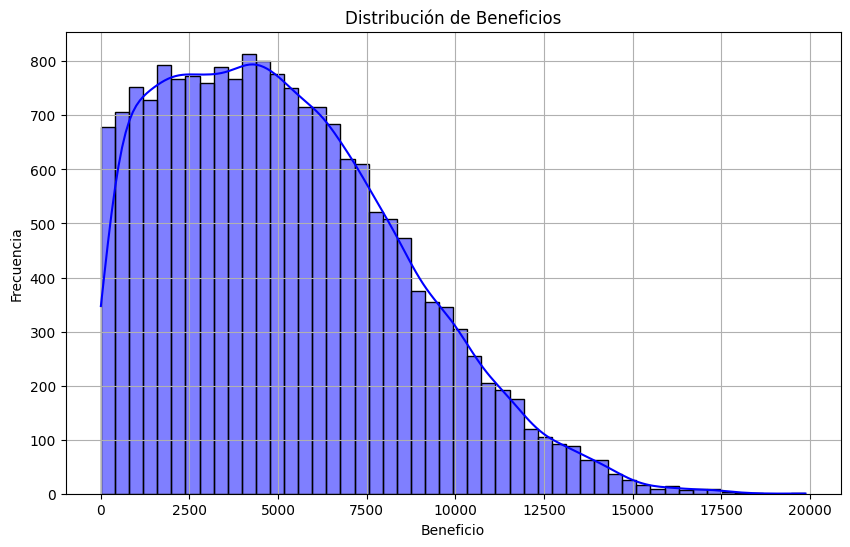

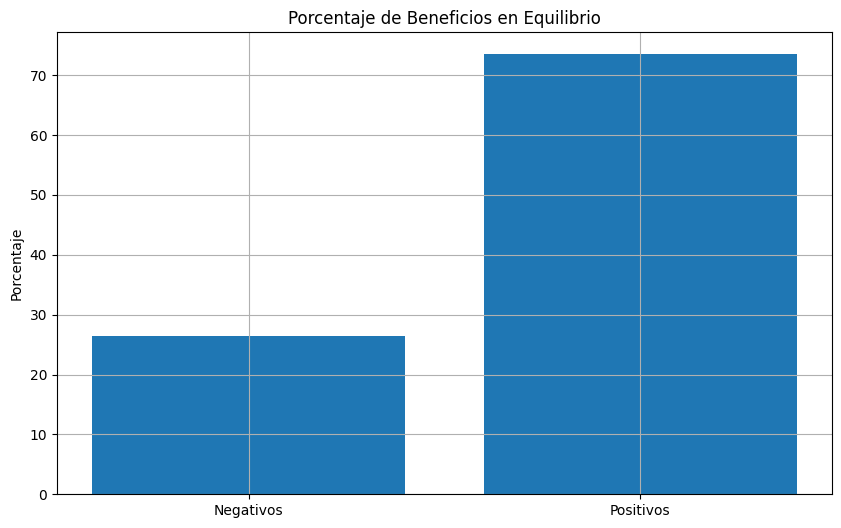

In [29]:
#Beneficios mayor que 0, total de beneficios
resultados_c = simulacion()
resultados_c = [x for x in resultados_c if x > 0]
print("Total de beneficios en equilibrio: ", len(resultados_c))
print("Porcentaje de beneficios positivos: ", len(resultados_c)/25000*100, "%")

plt.figure(figsize=(10,6))
sns.histplot(resultados_c, bins=50, kde=True, color='b')
plt.title("Distribución de Beneficios")
plt.xlabel("Beneficio")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()

#Diagrama de barras porcentajes beneficios en equilibrio, negativos y positivos con el porcentaje
plt.figure(figsize=(10,6))
plt.bar(["Negativos", "Positivos"], [100-len(resultados_c)/250, len(resultados_c)/250])
plt.title("Porcentaje de Beneficios en Equilibrio")
plt.ylabel("Porcentaje")
plt.grid()
plt.show()




Punto D.

In [20]:
def configuracion_optima(num_sim=25000) :
    resultados = []
    for filas_pc in range(0, 21):
        filas_t = 40-(2*filas_pc)

        if filas_t < 0:
            break
        beneficios = []

        binom_pc = stats.rv_discrete(name='fracciones',values=(fracciones_primeraclase, probabilidades_primeraclase))

        for _ in range(num_sim):
            ingresos = 0
            demanda_BA = demanda_tramo_BA.rvs()
            demanda_CB = demanda_tramo_CB.rvs()
            demanda_AC = demanda_tramo_AC.rvs()
            
            demanda_primera_clase_BA = np.random.binomial(int(demanda_BA), binom_pc.rvs())
            demanda_turista_BA = demanda_BA - demanda_primera_clase_BA


            demanda_primera_clase_AC = np.random.binomial(int(demanda_AC), binom_pc.rvs())
            demanda_turista_AC = demanda_AC - demanda_primera_clase_AC

            demanda_primera_clase_CB = np.random.binomial(int(demanda_CB), binom_pc.rvs())
            demanda_turista_CB = demanda_CB - demanda_primera_clase_CB


            #Ocupacion efectiva
            ocupados_turista_BA = min(demanda_turista_BA, filas_t * 6)
            ocupados_primera_clase_BA = min(demanda_primera_clase_BA, filas_pc * 4)

            ocupados_turista_AC = min(demanda_turista_AC, filas_t * 6)
            ocupados_primera_clase_AC = min(demanda_primera_clase_AC, filas_pc * 4)

            ocupados_turista_CB = min(demanda_turista_CB, filas_t * 6)
            ocupados_primera_clase_CB = min(demanda_primera_clase_CB, filas_pc * 4)
            

            ingresos += ocupados_primera_clase_BA * primera_clase["BA"]
            ingresos += ocupados_turista_BA * clase_turista["BA"]
            ingresos += ocupados_primera_clase_AC * primera_clase["AC"]
            ingresos += ocupados_turista_AC * clase_turista["AC"]
            ingresos += ocupados_primera_clase_CB * primera_clase["CB"]
            ingresos += ocupados_turista_CB * clase_turista["CB"]

            beneficio = ingresos - costo_fijo
            beneficios.append(beneficio)
        
        resultados.append((filas_pc, filas_t, np.mean(beneficios)))
    return resultados
   



    

In [31]:
#Configuracion optima
resultados = configuracion_optima()
df = pd.DataFrame(resultados, columns=["Filas Primera Clase", "Filas Turista", "Media de Beneficios"])
print(df)




    Filas Primera Clase  Filas Turista  Media de Beneficios
0                     0             40        -11223.354586
1                     1             38         -6255.781396
2                     2             36         -1343.500652
3                     3             34          2985.564915
4                     4             32          6663.158021
5                     5             30          9219.644460
6                     6             28          9450.014742
7                     7             26          7073.244410
8                     8             24          2382.149462
9                     9             22         -3388.201880
10                   10             20         -9562.771915
11                   11             18        -15880.784000
12                   12             16        -22213.986000
13                   13             14        -28496.698000
14                   14             12        -34823.536000
15                   15             10  

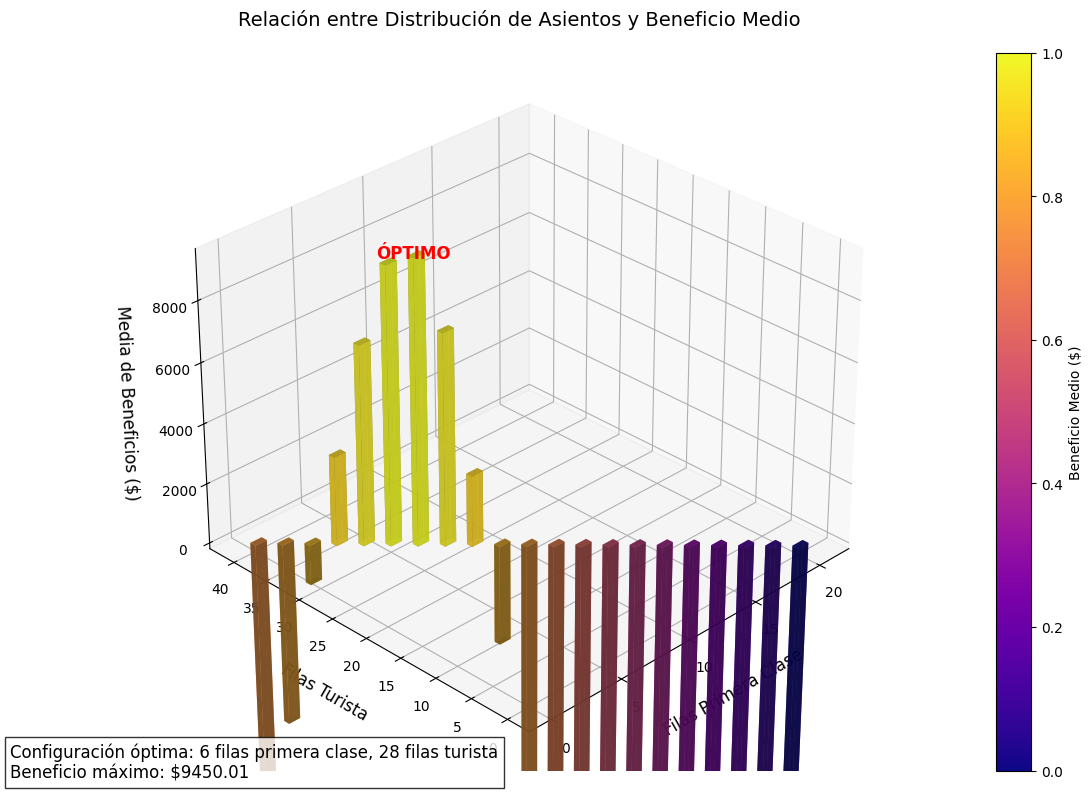

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Suponiendo que tus datos están en un DataFrame llamado df
filas_primera = df['Filas Primera Clase']
filas_turista = df['Filas Turista']
beneficios = df['Media de Beneficios']

# Crear figura y ejes 3D
fig = plt.figure(figsize=(12, 8), dpi=100)
ax = fig.add_subplot(111, projection='3d')

# Graficar barras 3D
xpos = filas_primera
ypos = filas_turista
zpos = np.zeros_like(xpos)  # base de las barras en z=0

# Dimensiones de las barras
dx = dy = 0.8
dz = beneficios

# Colorear según el valor del beneficio
colors = plt.cm.plasma((beneficios - min(beneficios)) / (max(beneficios) - min(beneficios)))

# Graficar barras
bars = ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors, alpha=0.8, shade=True)

# Añadir etiquetas y título
ax.set_xlabel('Filas Primera Clase', fontsize=12, labelpad=10)
ax.set_ylabel('Filas Turista', fontsize=12, labelpad=10)
ax.set_zlabel('Media de Beneficios ($)', fontsize=12, labelpad=10)
plt.title('Relación entre Distribución de Asientos y Beneficio Medio', fontsize=14, pad=20)

# Añadir barra de color
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), ax=ax, pad=0.1)
cbar.set_label('Beneficio Medio ($)', fontsize=10)

# Ajustar la vista
ax.view_init(elev=30, azim=225)

# Encontrar la configuración óptima
idx_max = np.argmax(beneficios)
config_optima = f"Configuración óptima: {filas_primera[idx_max]} filas primera clase, {filas_turista[idx_max]} filas turista"
beneficio_max = f"Beneficio máximo: ${beneficios[idx_max]:.2f}"

# Añadir texto informativo
plt.figtext(0.02, 0.02, f"{config_optima}\n{beneficio_max}", fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Resaltar la barra óptima
ax.text(filas_primera[idx_max], filas_turista[idx_max], beneficios[idx_max], 
       "ÓPTIMO", color='red', fontweight='bold', fontsize=12,
       horizontalalignment='center')

plt.tight_layout()
plt.show()